In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn

seaborn.set_context(context='talk')
%matplotlib inline


/home/webdev/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/webdev/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


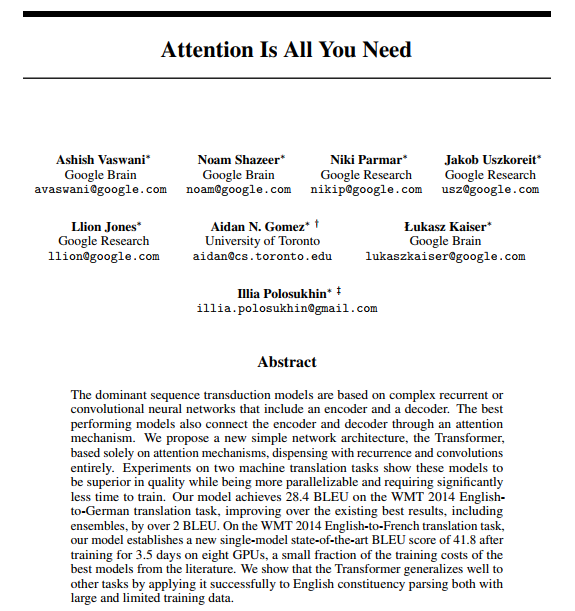

In [3]:
from IPython.display import Image
Image(filename='images/aiayn.png')

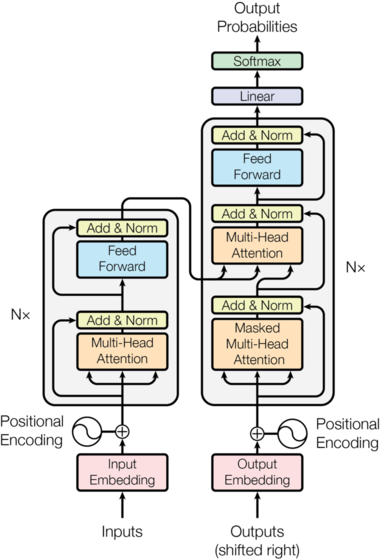

In [4]:
Image(filename='images/ModalNet-21.png')

In [36]:
a = torch.linspace(-1, 1, 100)
print(a)
F.softmax(a)

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

/home/webdev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([0.0031, 0.0032, 0.0032, 0.0033, 0.0034, 0.0035, 0.0035, 0.0036, 0.0037,
        0.0037, 0.0038, 0.0039, 0.0040, 0.0041, 0.0041, 0.0042, 0.0043, 0.0044,
        0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.0050, 0.0051, 0.0052, 0.0053,
        0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0060, 0.0061, 0.0062, 0.0063,
        0.0065, 0.0066, 0.0067, 0.0069, 0.0070, 0.0071, 0.0073, 0.0074, 0.0076,
        0.0077, 0.0079, 0.0081, 0.0082, 0.0084, 0.0086, 0.0087, 0.0089, 0.0091,
        0.0093, 0.0095, 0.0097, 0.0099, 0.0101, 0.0103, 0.0105, 0.0107, 0.0109,
        0.0111, 0.0114, 0.0116, 0.0118, 0.0121, 0.0123, 0.0126, 0.0128, 0.0131,
        0.0134, 0.0136, 0.0139, 0.0142, 0.0145, 0.0148, 0.0151, 0.0154, 0.0157,
        0.0160, 0.0164, 0.0167, 0.0170, 0.0174, 0.0177, 0.0181, 0.0185, 0.0188,
        0.0192, 0.0196, 0.0200, 0.0204, 0.0208, 0.0213, 0.0217, 0.0221, 0.0226,
        0.0231])

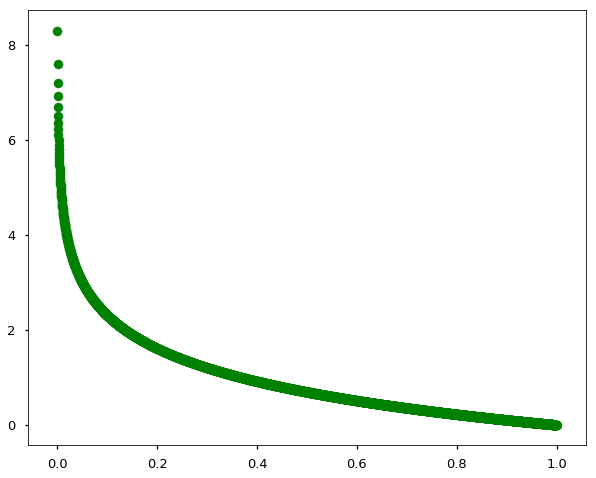

In [322]:
import matplotlib.pyplot as plt
import matplotlib
import torch
%matplotlib inline
N = 4000
a = torch.linspace(0, 1, N)
plt.figure(figsize=(10,8))
plt.scatter(a,-a.log().numpy(), color='g')
plt.show()

In [85]:
a = torch.randn(4)
b = torch.randn(4, 1)


In [86]:
a

tensor([-0.2226, -0.2039, -0.7045, -0.4407])

In [87]:
b

tensor([[ 1.1599],
        [ 1.3727],
        [-0.2658],
        [-0.0546]])

In [88]:
torch.add(a, b)

tensor([[ 0.9373,  0.9561,  0.4554,  0.7192],
        [ 1.1501,  1.1688,  0.6682,  0.9320],
        [-0.4884, -0.4697, -0.9703, -0.7065],
        [-0.2772, -0.2584, -0.7590, -0.4952]])

In [90]:
t = torch.randn(1,3)
t1 = torch.randn(3, 1)
t2 = torch.randn(1, 3)


In [91]:

torch.addcmul(t, 0.1, t1, t2)

tensor([[-1.5662, -0.8166, -0.4080],
        [-1.5625, -0.8475, -0.3412],
        [-1.5506, -0.9440, -0.1321]])

In [106]:
a = torch.randn(4, 5)
a

tensor([[-0.1148, -0.1157,  1.3315,  0.7473, -0.8114],
        [ 0.8218, -0.7882, -0.3966, -0.2347,  0.9851],
        [ 0.7226,  0.1226,  0.3655, -0.1506,  0.6956],
        [ 1.0604, -0.7368, -0.9866, -0.4734,  0.4970]])

In [120]:
b = torch.empty(4).fill_(1.0)
b

tensor([1., 1., 1., 1.])

In [119]:
a/b

tensor([[-0.0574, -0.1157,  1.3315,  0.7473, -0.4057],
        [ 0.4109, -0.7882, -0.3966, -0.2347,  0.4926],
        [ 0.3613,  0.1226,  0.3655, -0.1506,  0.3478],
        [ 0.5302, -0.7368, -0.9866, -0.4734,  0.2485]])

In [199]:
torch.remainder(torch.tensor([-3.,-2, -1, 1, 2, 3]), 2)

tensor([1., 0., 1., 1., 0., 1.])

In [197]:
a = torch.empty(2, 3).uniform_(1, 2)
a

tensor([[1.8187, 1.9144, 1.9591],
        [1.4032, 1.7356, 1.8383]])

In [207]:
a = torch.randn(32, 24)
a

tensor([[-0.4062,  1.2775, -0.0081,  0.2725, -0.9400,  0.1753,  1.7559, -0.8636,
         -0.5270, -0.0731, -0.1472, -0.3900,  0.9221,  2.1796, -0.4497, -1.2247,
          0.1951,  0.9338,  1.1934, -1.3294,  0.6039,  0.3547,  1.5102, -0.7770],
        [-1.3237, -0.0755,  0.4745,  0.3952, -0.3543, -1.4702, -0.0613,  0.9928,
         -0.9871, -1.5194,  2.0124,  1.0218, -0.6845, -0.7538,  0.3531,  0.6005,
          0.5908, -0.2305,  0.0846, -0.0051, -0.7174, -0.1153, -0.8783, -0.4373],
        [ 0.1246,  0.8351,  1.4496, -0.1382, -0.4443, -0.6192,  0.2118,  0.1874,
         -1.2350, -0.0401,  0.4131, -0.8754,  0.6453, -2.3071, -1.5359,  0.1912,
         -0.1417, -1.1498,  1.0544, -0.6501,  0.4376, -1.3551,  0.6742, -0.4204],
        [ 1.0358,  0.5450, -0.4610, -0.4080,  0.7240,  1.0961,  1.8848,  0.3479,
          1.9558,  0.0460,  0.5294,  1.4043,  0.2095, -0.3235, -0.0120, -0.7000,
         -1.1229, -0.5392, -0.8476,  0.3400,  0.2943,  0.5133, -0.9149, -0.9364],
        [-0.8573, -0.938

In [238]:
a = torch.arange(9, dtype= torch.float) - 4
b = a.reshape((3, 3))
b.prod()

tensor(0.)

In [236]:
torch.norm(torch.randn(100), dim=0)

tensor(9.6063)

In [270]:
a = torch.randn(4, 4)
a

tensor([[-0.9183, -0.4305,  0.5700,  0.5827],
        [-0.7835, -0.9336, -0.2614,  0.9226],
        [ 0.7886, -0.3278,  1.0883,  0.0389],
        [-0.8163,  0.1110,  0.8974,  1.9222]])

In [273]:
torch.argsort(a, dim=1)

AttributeError: module 'torch' has no attribute 'argsort'

In [275]:
x = torch.arange(1., 6.)
x

tensor([1., 2., 3., 4., 5.])

In [279]:
x = torch.randn(3, 4)
x

tensor([[-0.0617, -0.0283,  1.3344,  0.7663],
        [ 2.3675, -0.4846,  0.2080,  0.1016],
        [-0.3932,  0.5563, -3.8745,  2.4819]])

In [280]:
sorted, indices = torch.sort(x)
sorted, indices

(tensor([[-0.0617, -0.0283,  0.7663,  1.3344],
         [-0.4846,  0.1016,  0.2080,  2.3675],
         [-3.8745, -0.3932,  0.5563,  2.4819]]), tensor([[0, 1, 3, 2],
         [1, 3, 2, 0],
         [2, 0, 1, 3]]))

In [284]:
i = torch.randint(0, 8, (5,), dtype=torch.int64)
weights = torch.linspace(0, 1, steps=5)

In [285]:
i, weights

(tensor([6, 3, 6, 5, 5]), tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000]))

In [288]:
torch.diag(torch.randn(3))

tensor([[ 0.0634,  0.0000,  0.0000],
        [ 0.0000,  0.2248,  0.0000],
        [ 0.0000,  0.0000, -0.1344]])

In [289]:
x = torch.arange(8).view(2,2,2)

In [294]:
torch.flip(x, [0,1,2])

tensor([[[7, 6],
         [5, 4]],

        [[3, 2],
         [1, 0]]])

In [298]:
a = torch.randn(3, 3)
torch.det(a)

tensor(0.6384)

In [299]:
torch.pinverse(torch.randn(3,5))

tensor([[-0.2004, -0.0314,  0.5858],
        [ 0.2574,  0.1438,  0.0201],
        [-0.1091,  0.2724,  0.2957],
        [ 0.0809,  0.1625, -0.1828],
        [ 0.4590, -0.0666,  0.1381]])

In [305]:
a = torch.randn(3, 3)
a = torch.mm(a, a.t())
print(a)
u = torch.potrf(a)
u

tensor([[ 3.4087, -1.1439, -0.4296],
        [-1.1439,  3.6664,  2.6031],
        [-0.4296,  2.6031,  2.9238]])


tensor([[ 1.8463, -0.6196, -0.2327],
        [ 0.0000,  1.8118,  1.3572],
        [ 0.0000,  0.0000,  1.0138]])

In [306]:
torch.mm(u.t(), u)

tensor([[ 3.4087, -1.1439, -0.4296],
        [-1.1439,  3.6664,  2.6031],
        [-0.4296,  2.6031,  2.9238]])

In [307]:
torch.potri(u)

tensor([[ 0.3430,  0.1936, -0.1220],
        [ 0.1936,  0.8506, -0.7289],
        [-0.1220, -0.7289,  0.9730]])

In [316]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)
loss.backward()

In [318]:
print(loss.grad)

None
